In [1]:
 %matplotlib notebook
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import numpy as np

https://docs.einsteinpy.org/en/stable/api/symbolic/christoffel.html

# Tensores

Podemos definir los tensores como una progresión matemática de las cantidades escalares y vectoriales. En esta sección vamos a dar definiciones prácticas para ser implementadas numéricamente. 

1. Escalares: Representadas por un número único, son independientes del sistema de coordenadas.
2. Vectores: Representados por una tupla de valores de dependientes del sistema de coordenadas.
3. Tensores de segundo orden: Pueden ser representados por medio de matrices, los cuales en general, son independientes del sistema de coordenadas.

Un tensor puede relacionar dos vectores:

$$\mathbf{ u = Tv }$$

Usando la notación de indices:

$$ u_{i} = T_{ij}v_{j} $$

In [7]:
T = np.ones((3,3))
nx = T.shape[0]
ny = T.shape[1]

for i in range(len(T)):
    for j in range(len(T)):
        if( i != j):
            T[i,j] = i+1
        else:
            T[i,j] = j+2
print(T)

[[2. 1. 1.]
 [2. 3. 2.]
 [3. 3. 4.]]


In [22]:
# Crear dos vectores
u = np.zeros(3)
v = np.array([1.,2.,2.])

In [23]:
# Tensor: Transforma el v en u

for i in range(3):
    u[i] = 0.
    for j in range(3):
        u[i] += T[i,j]*v[j]
        
print(u)

[ 6. 12. 17.]


Los tensores pueden ser construidos a partir del producto de Kronecker de dos vectores

$$\mathbf{T = u \otimes v}$$ 

Usando notación de indices

$$ T_{ij} = u_{i}v_{j}  $$ 

In [24]:
S = np.ones((2,2))

sz1 = np.array([1,0])
sz2 = np.array([0,1])

In [25]:
for i in range(len(S)):
    for j in range(len(S)):
        S[i,j] = sz2[i]*sz1[j]
        
print(S)

[[0. 0.]
 [1. 0.]]


Si $b$ representa una matriz de cambio de coordenadas, las nuevas componentes del tensor se obtienen a través del tensor original. Esto es lo que realmente define a los tensores: Sus propiedades de transformación!

$$ \mathbf{ T' = b T b^{T} }  $$

En notación de subindices

$$  T_{ij}' = b_{ik}b_{jl}T_{kl}  $$

Tambien podemos encontrar el tensor original usando el tensor nuevo:

$$ \mathbf{ T = b^{T} T'b }  $$

1. Definamos una matriz que representa una rotación alrededor del eje 

In [26]:
theta = np.pi/4.0

b = np.array( [[np.cos(theta),+np.sin(theta),0],
              [-np.sin(theta), np.cos(theta),0],
               [0,0,1]])
print(b)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [27]:
# Encontrar las nuevas componentes

Tprime = np.zeros((3,3))

for i in range(len(T)):
    for j in range(len(T)):
        for k in range(len(T)):
            for l in range(len(T)):
                Tprime[i,j] += b[i,k]*b[j,l]*T[k,l]
    
print(Tprime)

[[4.00000000e+00 4.44089210e-16 2.12132034e+00]
 [1.00000000e+00 1.00000000e+00 7.07106781e-01]
 [4.24264069e+00 4.44089210e-16 4.00000000e+00]]


In [28]:
# Vamos a usar las formas matriciales

Tmp = np.dot(b,T)
Tprime2 = np.dot(Tmp,b.T)
print(Tprime2)

[[4.00000000e+00 4.44089210e-16 2.12132034e+00]
 [1.00000000e+00 1.00000000e+00 7.07106781e-01]
 [4.24264069e+00 4.44089210e-16 4.00000000e+00]]


### Tambien podemos transformar primero los vectores y posterioremente hacer el producto de kronecker

In [34]:
T = np.zeros((3,3))

for i in range(len(u)):
    for j in range(len(u)):
        T[i,j] = u[i]*v[j]
        
print(T)

[[ 6. 12. 12.]
 [12. 24. 24.]
 [17. 34. 34.]]


In [35]:
Tmp = np.dot(b,T)
Tprime2 = np.dot(Tmp,b.T)
print(Tprime2)

[[27.          9.         25.45584412]
 [ 9.          3.          8.48528137]
 [36.06244584 12.02081528 34.        ]]


In [29]:
uprime = np.zeros(3)
vprime = np.zeros(3)

for i in range(len(uprime)):
    for j in range(len(vprime)):
        uprime[i] += b[i,j]*u[j]
        vprime[i] += b[i,j]*v[j]
        
print(u)
print(v)
print(uprime)
print(vprime)

[ 6. 12. 17.]
[1. 2. 2.]
[12.72792206  4.24264069 17.        ]
[2.12132034 0.70710678 2.        ]


In [31]:
Tprime3 = np.ones((3,3))

for i in range(len(uprime)):
    for j in range(len(uprime)):
        Tprime3[i,j] = uprime[i]*vprime[j]
        
print(Tprime3)

[[27.          9.         25.45584412]
 [ 9.          3.          8.48528137]
 [36.06244584 12.02081528 34.        ]]


# Ejes principales de un tensor.

Los tensores pueden ser simétricos ($T_{ij}, T_{ji}$). Siempre es posible encontrar un sistema de coordenadas donde el tensor tome un forma diagonal. Podemos encontrar los ejes principales encontrando los valores y vectores propios.

In [36]:
T=np.ones((3,3))
T[0,0]=-4.0
T[1,1]=3.0
T[2,2]=2.0
T[0,1]=3.0;  T[1,0]=T[0,1]
T[0,2]=-1.0; T[2,0]=T[0,2]
T[1,2]=-3.0; T[2,1]=T[1,2]
print(T)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


In [37]:
valores, vectores = np.linalg.eig(T)
print(valores)
print(vectores)

[ 6.38719536 -5.11153053 -0.27566482]
[[-0.27656948 -0.93570162  0.21902465]
 [-0.76272731  0.35237891  0.54228789]
 [ 0.58459932  0.0170758   0.81114244]]


$\mathbf {T = ADA^{T}}$

In [38]:
D = np.zeros((3,3))

for i in range(len(D)):
    for j in range(len(D)):
        if(i==j):
            D[i,j] = valores[i]
print(D)

[[ 6.38719536  0.          0.        ]
 [ 0.         -5.11153053  0.        ]
 [ 0.          0.         -0.27566482]]


In [41]:
Ttmp = np.dot(vectores, D)
Tprime = np.matmul(Ttmp, vectores.T)
print(Tprime)

[[-4.  3. -1.]
 [ 3.  3. -3.]
 [-1. -3.  2.]]


In [46]:
def CreateData(Npoints):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
      
        a = 1.0
        b = 1.5
        c = 3.0
      
        ra = a * u**(1./3.)
        rb = b * u**(1./3.)
        rc = c * u**(1./3.)
        
        X = np.append(X, ra*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, rb*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, rc*np.cos(theta))
    
    return X, Y, Z

In [47]:
data_sphere = CreateData(5000)

<IPython.core.display.Javascript object>


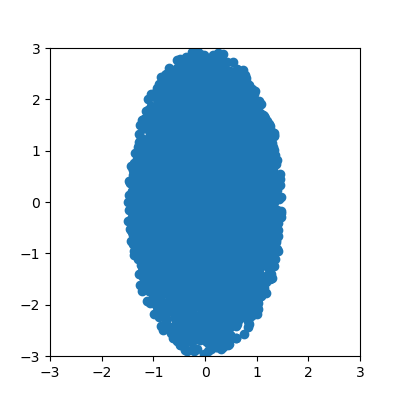

In [48]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(data_sphere[1], data_sphere[2])

In [54]:
theta = np.pi/4.0

rota = np.array([[ 1,0,0 ],
                 [ 0., np.cos(theta),-np.sin(theta)],
                 [ 0., np.sin(theta), np.cos(theta)]])
print(rota)

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


In [55]:
NewData = np.dot(rota.T,data_sphere)

<IPython.core.display.Javascript object>


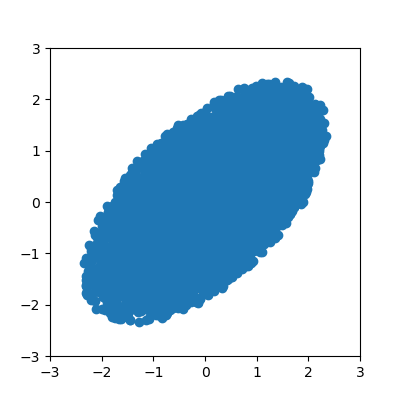

In [56]:
fig = plt.figure(figsize=(4,4))
plt.xlim(-3.,3.)
plt.ylim(-3.,3.)
plt.scatter(NewData[1], NewData[2])

<IPython.core.display.Javascript object>


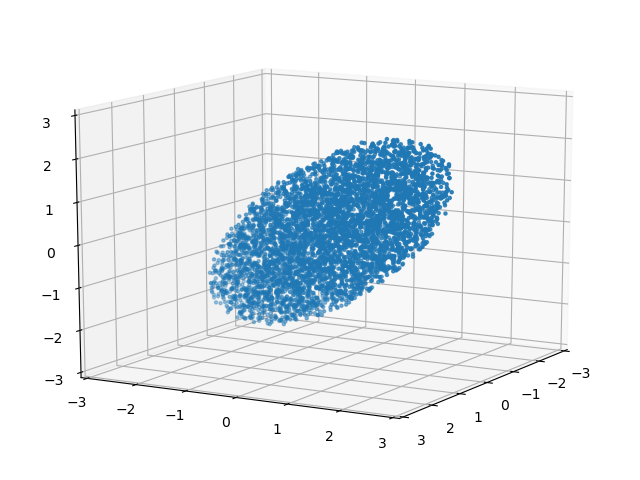

In [58]:
fig = plt.figure()
ax = Axes3D(fig, elev = 18, azim = 9)

X, Y, Z = NewData[0], NewData[1], NewData[2]

ax.scatter(X,Y,Z, marker='.')

ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)

plt.show()